In [1]:
# THE NORMAL EQUATION
# Normal equation minimizes directly the Cost Function (Closed Form)

import numpy as np

# generate some ramdom data:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 3x + 4 + noise

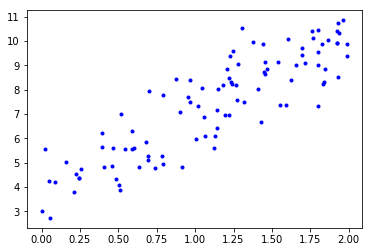

In [2]:
# Plot generated data:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(X,y, "b.")
plt.show()

In [3]:
# Compute W data using the Normal Equation:
# W or Theta_hat = (X.T . X)^-1 . X.T . y
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.81994191],
       [3.19154298]])

In [4]:
# Now use theta hat to compute predictions:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.81994191],
       [10.20302787]])

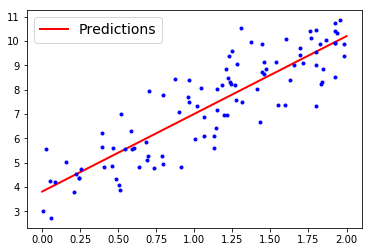

In [5]:
# plot results:
plt.plot(X_new, y_predict, "r-", linewidth=2,label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [6]:
# Lets do the same using sklearn library
from sklearn.linear_model import LinearRegression

lin_Reg = LinearRegression()
lin_Reg.fit(X,y)
lin_Reg.intercept_, lin_Reg.coef_

(array([3.81994191]), array([[3.19154298]]))

In [7]:
# similar values than the Normal Equation
# test their predictions:
y_pred_lr = lin_Reg.predict(X_new)
y_pred_lr

array([[ 3.81994191],
       [10.20302787]])

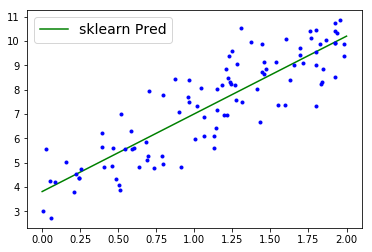

In [8]:
#plot it:
plt.plot(X_new, y_pred_lr, "g", label="sklearn Pred")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [9]:
# GRADIENT DESCENT
# Batch gradient descent example:
# Hyperparameters:
eta = 0.1 # learning rate
n_iterations = 1000 
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range (n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

theta

array([[3.81994191],
       [3.19154298]])

In [10]:
# using Stochastic Gradient Descent
# Hyperparameters:
n_epochs=50
t0,t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients
        
theta

array([[3.80868245],
       [3.17694878]])

In [11]:
# using sklearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

c:\users\lit_a\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([3.83010173]), array([3.20558613]))

In [12]:
# POLYNOMIAL REGRESSION
# Generate some nonlinear data
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

c:\users\lit_a\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\legend.py:638: UserWarning: Unrecognized location "Top Left". Falling back on "best"; valid locations are
	upper right
	center
	upper center
	center left
	center right
	best
	lower right
	lower left
	upper left
	lower center
	right

  % (loc, '\n\t'.join(self.codes)))


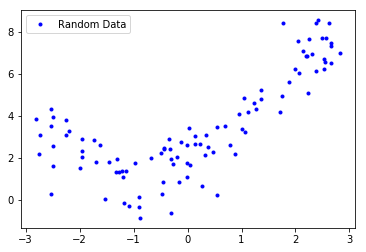

In [14]:
plt.plot(X,y, "b.", label="Random Data")
plt.legend(loc="Top Left")
plt.show()

In [16]:
# using polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# verify data:
print("Original X value: " + str(X[0])+ " After polynomial: " +str(X_poly[0]))

Original X value: [-1.69761173] After polynomial: [-1.69761173  2.88188559]


In [17]:
# FIT THE LINEAR REGRESSOR:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# show values:
lin_reg.intercept_ , lin_reg.coef_

(array([1.96100815]), array([[0.95935332, 0.49641064]]))

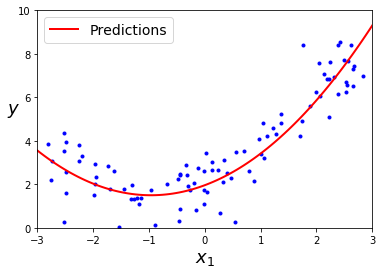

In [21]:
# not bad the model estimates: y_hat = 0.49x^2 + 0.95x + 1.96 which is very close to the actual value of the curve
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()